Привет! меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ..
</div>
<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Полезные ссылки</font>
* Очень интересная и полезная статья: https://dyakonov.org/2021/05/27/imbalance/

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за  качественную работу, видно, что приложено много усилий.
- Я оставил некоторые советы, надеюсь они будут полезными или интересными.
- Есть некоторые недочеты, которые нужно поправить, но у тебя это не должно занять много времени)
- Жду обновленную работу

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[3]</font>
* Спасибо за оперативность
- Приятно видеть фидбек 
- Недочеты исправлены - работа полностью корректна
- Рад был быть полезен. Удачи в дальнейшем обучении!


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
# < напишите код здесь >

data = pd.read_csv('/datasets/Churn.csv')


<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты на месте
</div>


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
data['Tenure'] = data['Tenure'].fillna(0)


<div class="alert alert-block alert-danger">  
<b>Ошибка:</b> Нужно не просто заполнить пропуски каким-то значением, а объяснить почему был выбран такой метод.

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Заполним пропуски нулями потому что удалять 10% строк нельзя, это приведет к обеднению датасета.
</div>

<div class="alert alert-block alert-info">
<b>Совет[2]:</b>  обработать их таким образом - допустимое, но аргументация слабая - нужно объяснять почему 0, а не 10? или не среднее/медиана . Но мне кажется, что так как природа пропусков неизвестна можно заполнить их случайными числами, чтобы не влиять на распределение или же использовать медиану .
</div>


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
len(data['Surname'].unique())

2932

In [7]:
#удалим неинформативный категориальный признак
data = data.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1)

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Удалить неинформативные признаки - верное решение. Но мне кажется их тут больше
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Нас интересуют только неинформативные категориальные признаки с большим количеством категорий. Преобразовать их в количественные было бы очень громоздко и не нужно. Неинформативные количественные признаки нам не мешают.
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка[2]:</b> Они могут мешать обучению модели и занижать качество предсказаний.
</div>


<div class="alert alert-block alert-warning">
<b>Изменения:</b> Удалил ещё столбцы с признаками RowNumber и CustomerID.
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[3]:</b> 👍
</div>


In [8]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
#выполним прямое кодирование двух оставшихся категориальных признаков
data_ohe = pd.get_dummies(data, drop_first=False)


<div class="alert alert-block alert-success">
<b>Успех:</b>  OHE - хороший выбор, молодец, что не забываешь про drop_first. Но советую в будущем обратить внимание на инструмент OneHotEncoder от sklearn
</div>



In [11]:
#target = data_ohe['Exited']
#features = data_ohe.drop('Exited', axis=1)
#features_train, features_valid, target_train, target_valid = train_test_split(
#    features, target, test_size=0.25, random_state=12345)
#data_ohe.head();

In [12]:
data_ohe_train, data_ohe_test1 = train_test_split(data_ohe, test_size=0.4, random_state=12345)
data_ohe_test, data_ohe_valid=train_test_split(data_ohe_test1, test_size=0.5, random_state=12345)
print(data_ohe_train.shape)
print(data_ohe_test.shape)
print(data_ohe_valid.shape)

# зададим признаки и целевые признаки 
features_train = data_ohe_train.drop(['Exited'], axis=1)
target_train = data_ohe_train['Exited']
features_valid = data_ohe_valid.drop(['Exited'], axis=1)
target_valid = data_ohe_valid['Exited']
features_test = data_ohe_test.drop(['Exited'], axis=1)
target_test = data_ohe_test['Exited']

data_ohe.head()

(6000, 14)
(2000, 14)
(2000, 14)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [13]:
# масштабирование признаков
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

pd.options.mode.chained_assignment = None

features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7479,-0.886751,-0.373192,1.104696,1.232271,-0.891560,1,0,-0.187705,0,0,1,0,1
3411,0.608663,-0.183385,1.104696,0.600563,-0.891560,0,0,-0.333945,1,0,0,1,0
6027,2.052152,0.480939,-0.503694,1.027098,0.830152,0,1,1.503095,0,1,0,0,1
1247,-1.457915,-1.417129,0.461340,-1.233163,0.830152,1,0,-1.071061,1,0,0,0,1
3716,0.130961,-1.132419,-0.825373,1.140475,-0.891560,0,0,1.524268,0,1,0,1,0



<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что scaler обучен только на трейне
</div>


<div class="alert alert-block alert-danger">  
<b>Ошибка:</b> После предоработки нужны выводы, что было проделано

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Вывод: в ходе предобработки мы избавились от пропусков в данных, перевели категориальные признаки в количественные, а также отмасштабировали количественные признаки.
</div>

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> ок
</div>

<div class="alert alert-block alert-info">
<b>Совет[2]:</b>  Советую обратить внимание на библиотеки sweetviz и pandas_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям. 
    
Очень просты в использоовании, на вход кладется датафрейм: pandas_profiling.ProfileReport(df) 

</div>

## Исследование задачи

In [14]:
#обучим модель классификации решающего дерева и посчитаем F1-меру
best_model = None
best_result = 0
for depth in range(1, 11):
    
    model = model = DecisionTreeClassifier(max_depth=depth, random_state = 12345)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
print(best_model)
print("F1:", best_result)

DecisionTreeClassifier(max_depth=9, random_state=12345)
F1: 0.5251396648044693


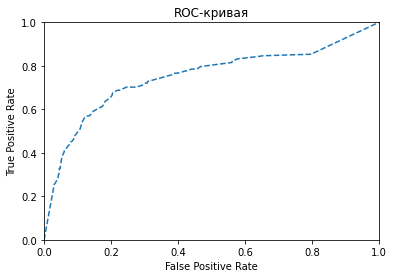

AUC-ROC:  0.7499209229602246


In [15]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC-ROC: ",auc_roc)

In [16]:
#обучим модель классификации случайного леса и посчитаем F1-меру
best_model = None
best_result = 0
for depth in range(1, 16, 1):
    for est in range(10, 51, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result

print(best_model)
print('Лучший результат F1: ', best_result)

RandomForestClassifier(max_depth=15, n_estimators=50, random_state=12345)
Лучший результат F1:  0.544918998527246


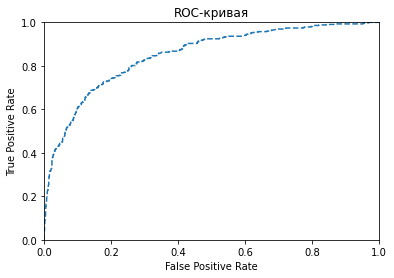

AUC-ROC:  0.8501876112137989


In [17]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC-ROC: ",auc_roc)

In [18]:
#обучим модель логистической регрессии и посчитаем F1-меру
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.2743055555555555


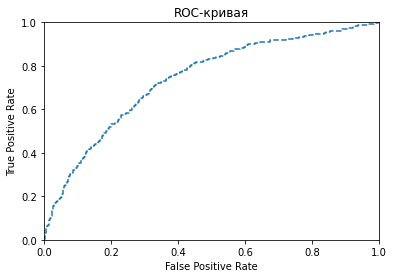

AUC-ROC:  0.7386395151340712


In [19]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC-ROC: ",auc_roc)

# Вывод: ни одна модель не дотягивает до целевого показателя F-1, при этом ROC-кривая и показатель AUC-ROC имеют показатели выше среднего. Это говорит о том, что все три модели уже лучше, чем случайные модели.
# Улучшим метрику F-1. Взглянем на баланс классов:

<div class="alert alert-block alert-info">
    
<b>Совет:</b>  Пожалуйста не выделяй весь текст вывода в жирный большой шрифт - это сложно воспринимать, старайся выделять только **ключевые** и **важные** моменты.
</div>

0    0.7963
1    0.2037
Name: Exited, dtype: float64


<AxesSubplot:>

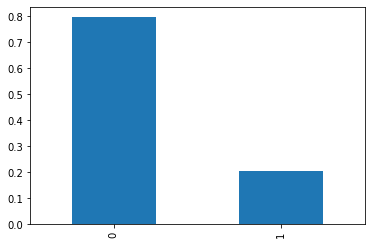

In [20]:
#проверим баланс классов на целевых признаках
class_frequency = data_ohe['Exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

0    0.9235
1    0.0765
dtype: float64


<AxesSubplot:>

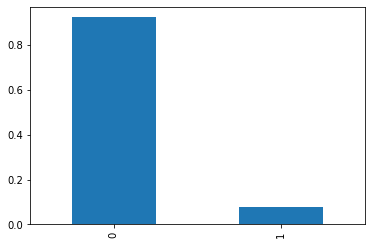

In [21]:
#проверим баланс классов на предсказании модели
predicted_valid = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

## Борьба с дисбалансом


<div class="alert alert-block alert-danger">  
<b>Ошибка:</b> Шаг проделан хорошо, но здесь нужен вывод

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Вывод: наблюдаем дисбаланс классов
</div>

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Старайся научиться писать выводы - это важный навык для дата саентиста
</div>

# Попробуем разные модели и методы балансировки:

In [22]:
# функция для upsampling
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [23]:
#upsampling
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [24]:
target_upsampled.value_counts(normalize=True)

0    0.501043
1    0.498957
Name: Exited, dtype: float64

In [25]:
#функция для downsampling
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [26]:
#downsampling
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [27]:
target_downsampled.value_counts(normalize=True)

0    0.501043
1    0.498957
Name: Exited, dtype: float64

# Модель решающего дерева:

In [28]:
#взвешивание классов
best_model = None
best_result = 0
for depth in range(1, 11):   
    model = model = DecisionTreeClassifier(max_depth=depth, random_state = 12345, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
print(best_model)
print("F1:", best_result)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=12345)
F1: 0.5809128630705395


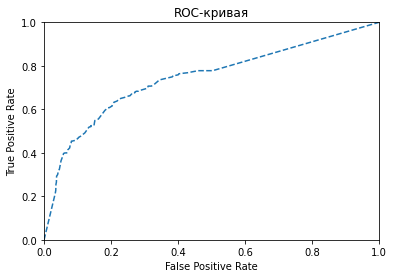

AUC-ROC:  0.7442678515480361


In [29]:
plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC-ROC: ",auc_roc)

In [30]:
#upsampling
best_model = None
best_result = 0
for depth in range(1, 11):
    
    model = model = DecisionTreeClassifier(max_depth=depth, random_state = 12345)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
print(best_model)
print("F1:", best_result)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

DecisionTreeClassifier(max_depth=5, random_state=12345)
F1: 0.5809128630705395


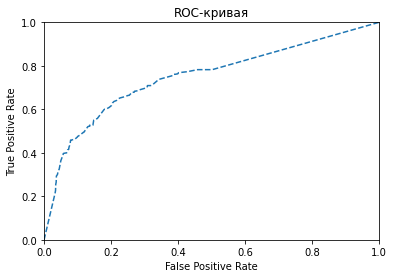

AUC-ROC:  0.7479526167379484


In [31]:
plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC-ROC: ",auc_roc)


<div class="alert alert-block alert-danger">  
<b>Ошибка:</b> 
    
1) Пожалуйста разделяй такие большие ячейки, на составляющие - каждое логическое действие должно быть отдельным. Так легче отслеживать ошибки, дебажить код, да и мне его комментировать
    
2) Наша цель избавиться от дисбаланса, то есть использовать такой `repeat`, который устраняет дисбаланс, а не создает новый. Проверить можно через `target_upsampled.value_counts()`


</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Разбил код на меньшие куски. Подобрал величину repeat везде такую, чтобы получалось максимальное значение F-1 меры
</div>


<div class="alert alert-block alert-danger">  
    
<b>Ошибка[2]:</b> 
    
- Не нужно подбирать repeat. нужно использовать такой `repeat`, который устраняет дисбаланс
    
- Проверить можно через `target_upsampled.value_counts()`. 
    
- Мы же не просто так исследовали дисбаланс - нужно применить правильное значение.
    
- Ниже повторять вызов upsmple/downsample не нужно, достаточно будет сделать 1 раз


</div>

<div class="alert alert-block alert-warning">
<b>Комментарий:</b> исправил
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[3]:</b> Есть контакт
</div>


In [32]:
#downsampling
best_model = None
best_result = 0
for depth in range(1, 11):
    
    model = model = DecisionTreeClassifier(max_depth=depth, random_state = 12345)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
print(best_model)
print("F1:", best_result)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

DecisionTreeClassifier(max_depth=5, random_state=12345)
F1: 0.5913875598086125


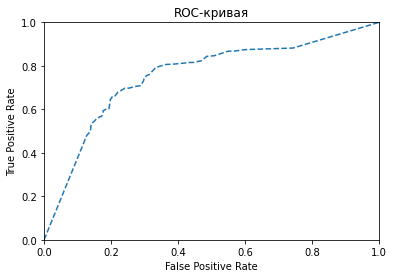

AUC-ROC:  0.7557658779949961


In [33]:
plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC-ROC: ",auc_roc)


<div class="alert alert-block alert-danger">  
<b>Ошибка:</b> 
    
1) Тоже самое
    
2)Тоже самое с `fraction`


</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Разбил код на меньшие куски. Подобрал величину fraction везде такую, чтобы получалось максимальное значение F-1 меры
</div>

# Модель случайного леса:

In [34]:
#взвешивание классов
best_model = None
best_result = 0
for depth in range(1, 16, 1):
    for est in range(10, 51, 10):
        model_rf_w = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model_rf_w.fit(features_train, target_train)
        predicted_valid = model_rf_w.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model_rf_w
            best_result = result

print(best_model)
print('Лучший результат F1: ', best_result)

probabilities_valid = model_rf_w.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=30,
                       random_state=12345)
Лучший результат F1:  0.6170921198668147


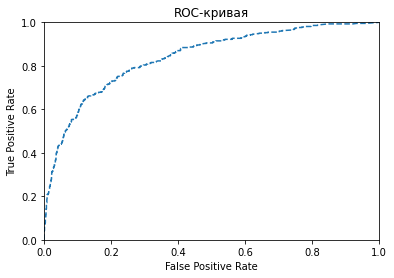

AUC-ROC:  0.8395598069770683


In [35]:
plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC-ROC: ",auc_roc)

In [36]:
#upsampling
best_model = None
best_result = 0
for depth in range(1, 16, 1):
    for est in range(10, 51, 10):
        model_rf_u = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf_u.fit(features_upsampled, target_upsampled)
        predicted_valid = model_rf_u.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model_rf_u
            best_result = result

print(best_model)
print('Лучший результат F1: ', best_result)

probabilities_valid = model_rf_u.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

RandomForestClassifier(max_depth=12, n_estimators=30, random_state=12345)
Лучший результат F1:  0.6118192352259559


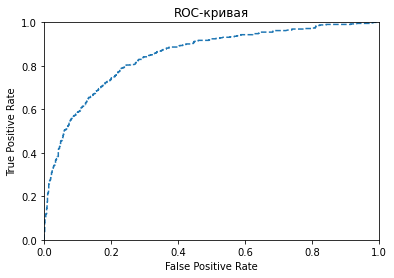

AUC-ROC:  0.8485528526948406


In [37]:
plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC-ROC: ",auc_roc)


<div class="alert alert-block alert-danger">  
<b>Ошибка:</b>  Не нужно дублировать функции upsample/downsample. Функции созданы для того, чтобы их 1 раз объявлять и вызывать по надобности с разными аргументами. Но у нас такой надобности нет - нам даже вызов функции достаточно сделать 1 раз. Исправь это везде


</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Исправил везде
</div>

In [38]:
#downsampling
best_model = None
best_result = 0
for depth in range(1, 16, 1):
    for est in range(10, 51, 10):
        model_rf_d = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf_d.fit(features_downsampled, target_downsampled)
        predicted_valid = model_rf_d.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model_rf_d
            best_result = result

print(best_model)
print('Лучший результат F1: ', best_result)

probabilities_valid = model_rf_d.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

RandomForestClassifier(max_depth=7, n_estimators=30, random_state=12345)
Лучший результат F1:  0.5888787602552416


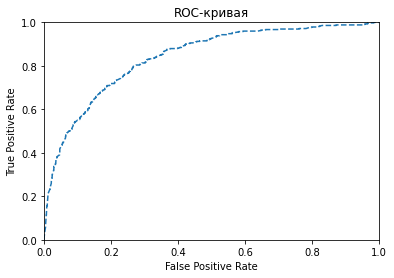

AUC-ROC:  0.8410319141440715


In [39]:
plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC-ROC: ",auc_roc)

# Модель логистической регрессии:

F1: 0.4788245462402766


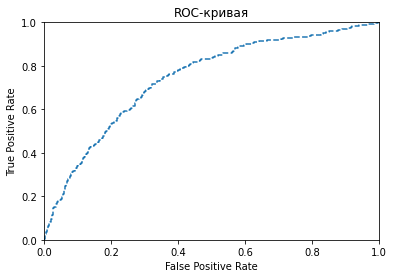

AUC-ROC:  0.7417396349114262


In [40]:
#взвешивание классов
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC-ROC: ",auc_roc)

In [41]:
#upsampling
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

F1: 0.4779220779220779


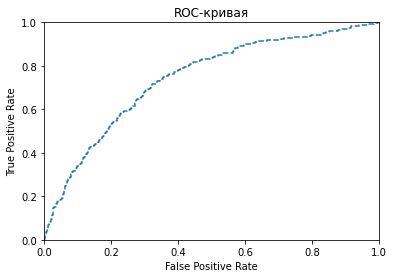

AUC-ROC:  0.7416856676425747


In [42]:
plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC-ROC: ",auc_roc)

In [43]:
#downsampling
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

F1: 0.48370497427101194


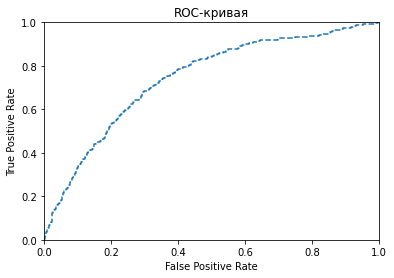

AUC-ROC:  0.7412224485849332


In [44]:
plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC-ROC: ",auc_roc)

# Вывод: целевого показателя F-1 достигла только модель случайного леса через взвешивание классов и upsampling, а также модель решающего дерева через downsampling.

## Тестирование модели


<div class="alert alert-block alert-danger">
    
<b>Ошибка:</b> 
    
- Все, что ниже происходит с валидационной выборке, находится не на своем месте. Подбор гиперпараметров должен быть в шаге `3 борьба с дисбалансом`, потому что тестирование модели - это означает, оценить лучшую модель на тестовой выборке (f1, roc_auc), то есть одно логическое действие.
    

</div>


<div class="alert alert-block alert-warning">
<b>Изменения:</b> Исправил
</div>

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 👍
</div>


<div class="alert alert-block alert-danger">  
    
<b>Ошибка[2]:</b> f1 на тесте нужно достичь > 0.59 - достигается за счет удаления неинформативных признаков, правильного устранения дисбаланса и подбора гиперпараметров на валидации

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий:</b> Исправил. Теперь на тесте получилось >0.59
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[3]:</b> Рад, это наблюдать, молодец!
</div>


# Протестируем все модели случайного леса:

Результат F1 на тестовой выборке:  0.5916305916305916


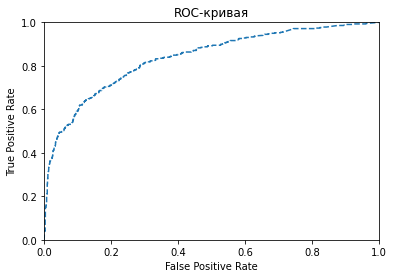

AUC-ROC на тестовой выборке:  0.8370445925755661


In [45]:
#взвешивание классов
predicted_test = model_rf_w.predict(features_test)
print('Результат F1 на тестовой выборке: ', f1_score(target_test, predicted_test))

probabilities_test = model_rf_w.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_test, probabilities_one_test)
print("AUC-ROC на тестовой выборке: ",auc_roc) 

In [46]:
#upsampling
predicted_test = model_rf_u.predict(features_test)
print('Результат F1 на тестовой выборке: ', f1_score(target_test, predicted_test))

probabilities_test = model_rf_u.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

Результат F1 на тестовой выборке:  0.6025316455696201


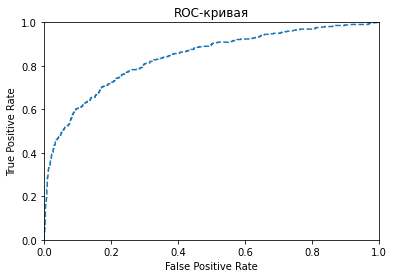

AUC-ROC на тестовой выборке:  0.8380502241121711


In [47]:
plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_test, probabilities_one_test)
print("AUC-ROC на тестовой выборке: ",auc_roc) 

In [48]:
#downsampling
predicted_test = model_rf_d.predict(features_test)
print('Результат F1 на тестовой выборке: ', f1_score(target_test, predicted_test))

probabilities_test = model_rf_d.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

Результат F1 на тестовой выборке:  0.5743685687558465


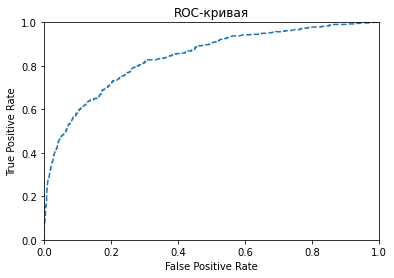

AUC-ROC на тестовой выборке:  0.8393015926783975


In [49]:
plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score(target_test, probabilities_one_test)
print("AUC-ROC на тестовой выборке: ",auc_roc) 

# Вывод: Ближайшее к целевому (и к валидационному) значение F-1 на тестовой выборке показывает модель случайного леса, обученная с балансировкой классов через downsampling.

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Изменил вывод
</div>

<div class="alert alert-block alert-info">
<b>Совет:</b> Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))<br> Очень ВАЖНАЯ для аналитики штука. Ведь нам не просто модель с метрикой нужна, а ещё и причины понять высокой/низкой метрики. Т.е. понять с какой силой сами факторы влияют на целевую.
</div>



## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*